# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
print (f'df_tesla shape is {df_tesla.shape}')
print (f'df_btc_search shape is {df_btc_search.shape}')
print (f'df_btc_price shape is {df_btc_price.shape}')
print (f'df_unemployment shape is {df_unemployment.shape}')


df_tesla shape is (124, 3)
df_btc_search shape is (73, 2)
df_btc_price shape is (2204, 3)
df_unemployment shape is (181, 3)


In [4]:
print (f'df_tesla columns are {df_tesla.columns}')
print (f'df_btc_search columns are {df_btc_search.columns}')
print (f'df_btc_price colums are {df_btc_price.columns}')
print (f'df_unemployment columns are {df_unemployment.columns}')

df_tesla columns are Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
df_btc_search columns are Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
df_btc_price colums are Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
df_unemployment columns are Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [5]:
df_btc_search.BTC_NEWS_SEARCH.max() # 0.0

np.int64(100)

In [6]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [8]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [9]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Unemployment Data

In [10]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [11]:
print(f'Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin

In [12]:
df_btc_price.shape

(2204, 3)

In [13]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [14]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [15]:
print (f'\ndf_unemployment: {df_unemployment.isna().sum()}')
print (f'\ndf_btc_price: {df_btc_price.isna().sum()}')
print (f'\ndf_btc_search: {df_btc_search.isna().sum()}')
print (f'\ndf_tesla: {df_tesla.isna().sum()}')

# It looks like only df_btc_price has missing values. Let's investigate further.

#df_btc_price.info()

# let's find the specific row with missing values

print (f"df_btc_price: {df_btc_price[df_btc_price['CLOSE'].isna()]}")
print (f"df_btc_price: {df_btc_price[df_btc_price['VOLUME'].isna()]}")


df_unemployment: MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

df_btc_price: DATE      0
CLOSE     1
VOLUME    1
dtype: int64

df_btc_search: MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

df_tesla: MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64
df_btc_price:             DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN
df_btc_price:             DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


In [16]:
print(f'Missing values for Tesla?: {df_tesla.isna().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isna().sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().sum()}')

Missing values for Tesla?: MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64
Missing values for U/E?: MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64
Missing values for BTC Search?: MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64


In [17]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [18]:
print(f'Missing values for BTC Price?: {df_btc_price.isna().values.any()}')
print(f'Missing values for BTC price?: {df_btc_price.isna().sum()}')

Missing values for BTC Price?: True
Missing values for BTC price?: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [19]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()} ')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2 


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [20]:
df_btc_price.dropna(inplace=True)


In [23]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()} ')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 0 


,DATE,CLOSE,VOLUME


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [32]:
print (f'dtype of df_btc_price {df_btc_price.DATE.dtypes}')
print (f'dtype of dt_btc_search {df_btc_search.MONTH.dtypes}')
print (f'dtype of df_tesla {df_tesla.MONTH.dtypes}')
print (f'dtype of df_unemployment {df_unemployment.MONTH.dtypes}')

print (f'dtype of df_btc_price {df_btc_price.dtypes}')
print (f'dtype of dt_btc_search {df_btc_search.dtypes}')
print (f'dtype of df_tesla {df_tesla.dtypes}')
print (f'dtype of df_unemployment {df_unemployment.dtypes}')


dtype of df_btc_price object
dtype of dt_btc_search object
dtype of df_tesla object
dtype of df_unemployment object
dtype of df_btc_price DATE       object
CLOSE     float64
VOLUME    float64
dtype: object
dtype of dt_btc_search MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object
dtype of df_tesla MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object
dtype of df_unemployment MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object


In [35]:
# Convert Entire Column
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [38]:
import pandas as pd
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [39]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [40]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [41]:
print (f'dtype of df_btc_price {df_btc_price.DATE.dtypes}')
print (f'dtype of dt_btc_search {df_btc_search.MONTH.dtypes}')
print (f'dtype of df_tesla {df_tesla.MONTH.dtypes}')
print (f'dtype of df_unemployment {df_unemployment.MONTH.dtypes}')

print (f'dtype of df_btc_price {df_btc_price.dtypes}')
print (f'dtype of dt_btc_search {df_btc_search.dtypes}')
print (f'dtype of df_tesla {df_tesla.dtypes}')
print (f'dtype of df_unemployment {df_unemployment.dtypes}')


dtype of df_btc_price datetime64[ns]
dtype of dt_btc_search datetime64[ns]
dtype of df_tesla datetime64[ns]
dtype of df_unemployment datetime64[ns]
dtype of df_btc_price DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object
dtype of dt_btc_search MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object
dtype of df_tesla MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object
dtype of df_unemployment MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [42]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [46]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [45]:
df_btc_price_monthly = df_btc_price.resample('ME', on='DATE').mean()
df_btc_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


In [57]:
df_btc_price_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [49]:
print (df_btc_price_monthly.shape)
print (df_btc_price.shape)

(73, 2)
(2203, 3)


In [50]:
print (df_btc_search.shape)

(73, 2)


# Data Visualisation

### Notebook Formatting & Style Helpers

In [65]:
df_btc_search.tail()

,MONTH,BTC_NEWS_SEARCH
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16
72,2020-09-01,13


In [67]:
df_btc_price_monthly.tail()

,CLOSE,VOLUME
DATE,,
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10
2020-08-31,11680.820313,2.228593e+10
2020-09-30,10912.536133,2.122653e+10


Text(0, 0.5, 'close')

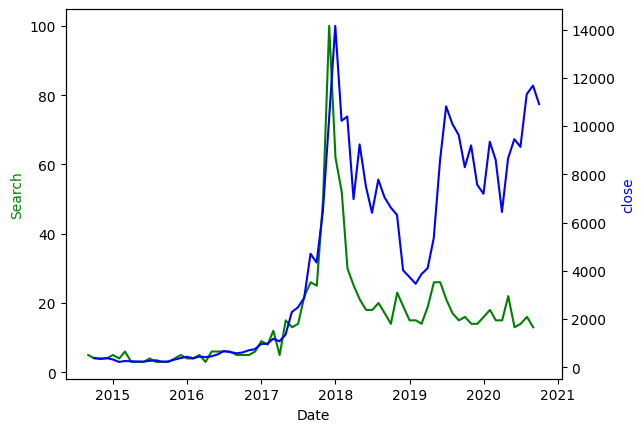

In [68]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, label='search', color = 'g')
ax2.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, label='close', color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('Search', color='green')
ax2.set_ylabel('close', color='blue')



In [107]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

<function pandas.plotting._misc.register() -> 'None'>

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'TSLA Stock Price')

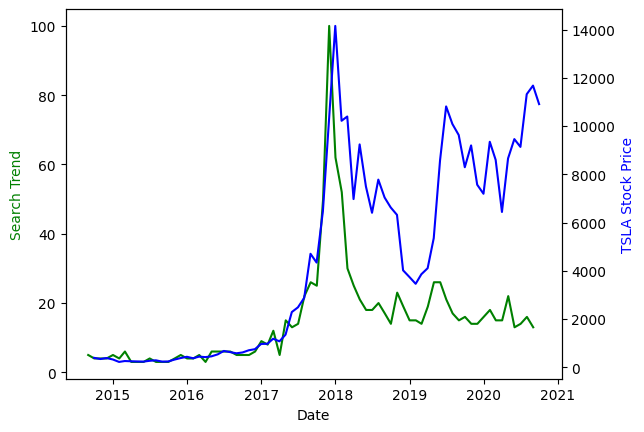

In [70]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, label='search', color = 'g')
ax2.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, label='close', color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trend', color='green')
ax2.set_ylabel('TSLA Stock Price', color='blue')



**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

In [71]:
# See the code above, I already colours

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

Text(0, 0.5, 'TSLA Stock Price')

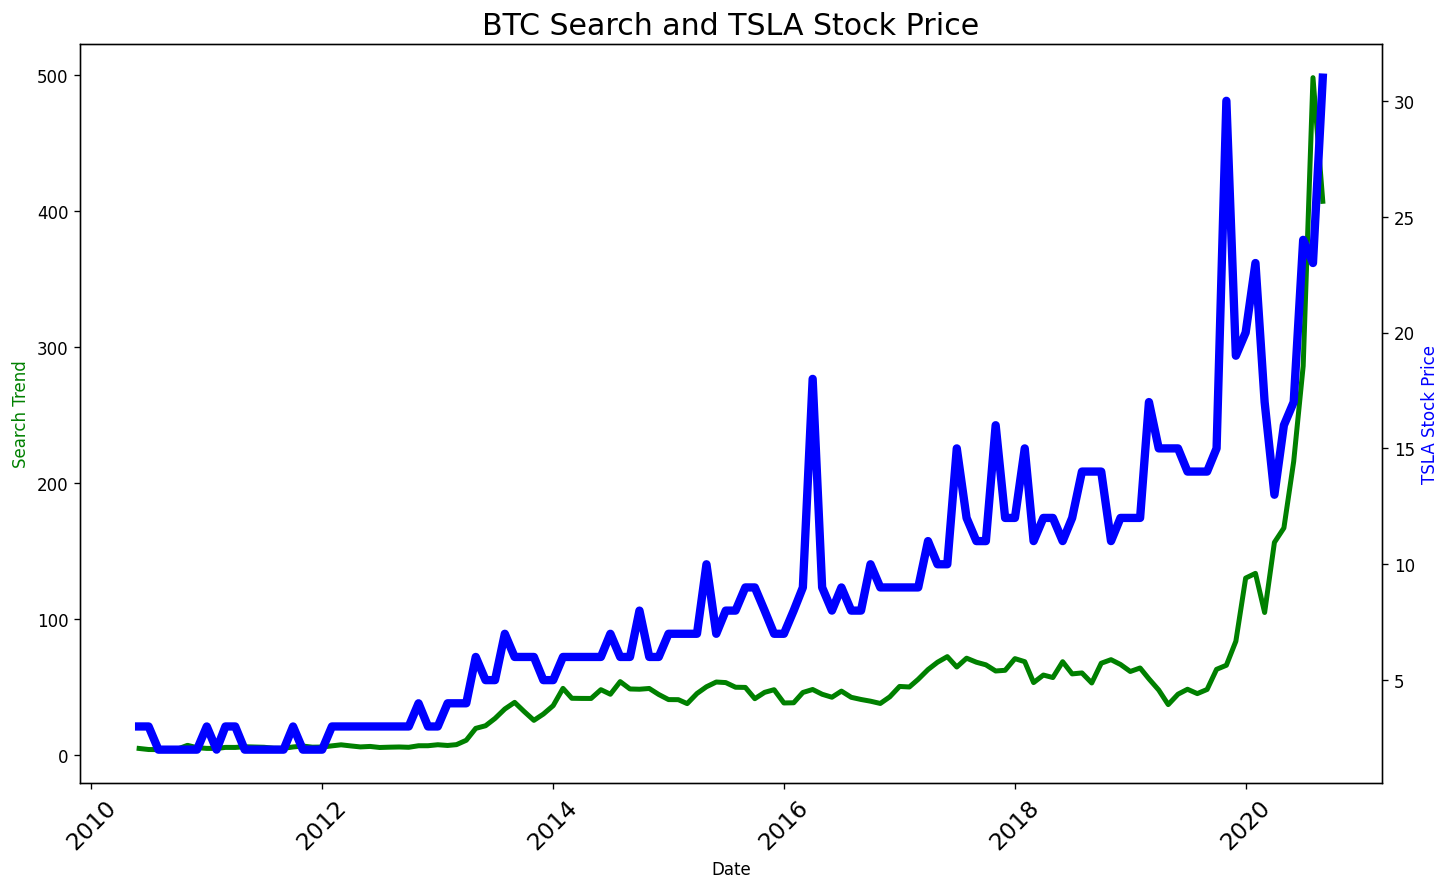

In [105]:
plt.figure(figsize=(14,8),
           dpi=120)
plt.xticks(size=14,
           rotation=45)
plt.title('BTC Search and TSLA Stock Price',
          fontsize=18
          )
ax1 = plt.gca()
ax2 = ax1.twinx()

# Per https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
#ax1.set_xlim("2015-0101")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, label='search', color = 'g', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, label='close', color='blue', linewidth=5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trend', color='green')
ax2.set_ylabel('TSLA Stock Price', color='blue')


How to add tick formatting for dates on the x-axis. 

Text(0, 0.5, 'TSLA Stock Price')

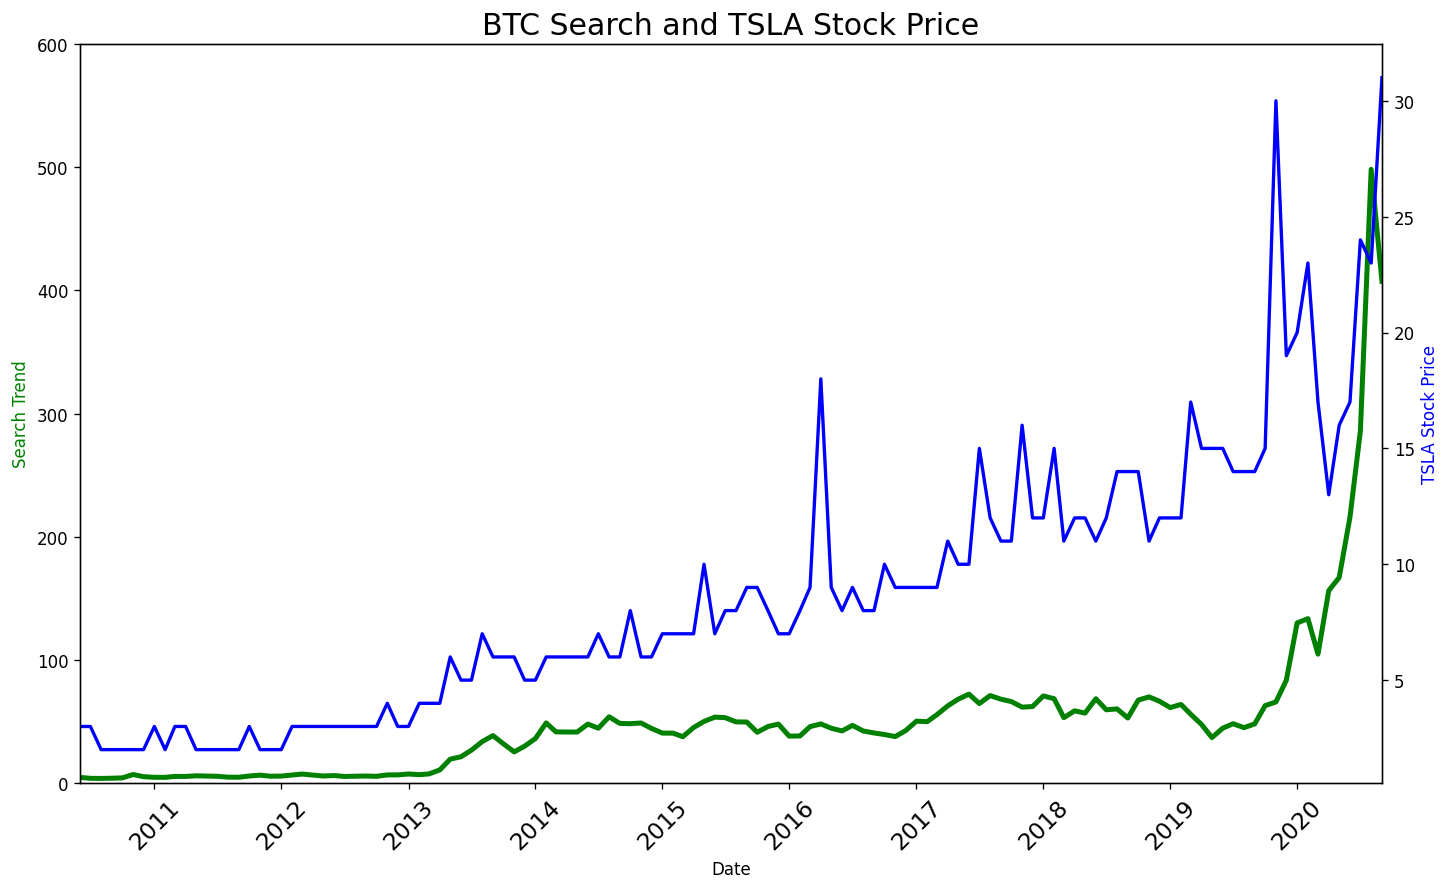

In [106]:
plt.figure(figsize=(14,8),
           dpi=120)
plt.xticks(size=14,
           rotation=45)
plt.title('BTC Search and TSLA Stock Price',
          fontsize=18
          )

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylim([0,600])
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

# Per https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
#ax1.set_xlim("2015-0101")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, label='search', color = 'g', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, label='close', color='blue', linewidth=2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trend', color='green')
ax2.set_ylabel('TSLA Stock Price', color='blue')


Text(0, 0.5, 'TSLA Stock Price')

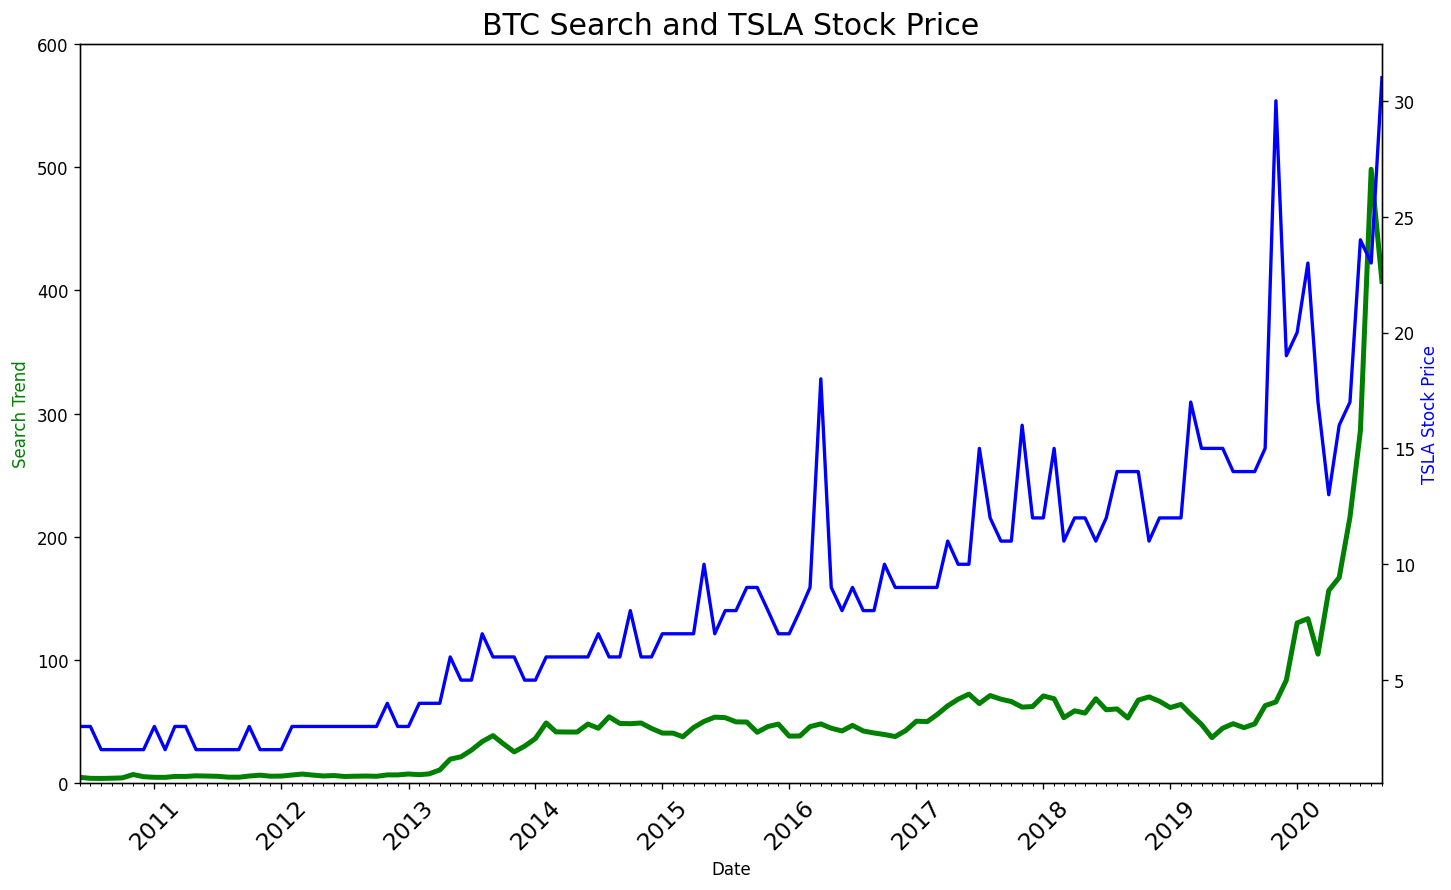

In [111]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8),
           dpi=120)
plt.xticks(size=14,
           rotation=45)
plt.title('BTC Search and TSLA Stock Price',
          fontsize=18
          )


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylim([0,600])
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

# Per https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
#ax1.set_xlim("2015-0101")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, label='search', color = 'g', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, label='close', color='blue', linewidth=2)

# format the tick
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)


ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trend', color='green')
ax2.set_ylabel('TSLA Stock Price', color='blue')


### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?